**Labelling the categories of Data**

In [2]:
import cv2,os

data_path='smaller_dataset'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)

{'without_mask': 0, 'with_mask': 1}
['without_mask', 'with_mask']
[0, 1]


**Summarize the data**

In [3]:
mask_dir = 'D:\\Machine Learning Stuff\\Face Mask Recognizition\\Test Model\\Face Mask Detector Project by Tasnuva Tehrin\\smaller_dataset\\with_mask'
without_mask_dir = 'D:\\Machine Learning Stuff\\Face Mask Recognizition\\Test Model\\Face Mask Detector Project by Tasnuva Tehrin\\smaller_dataset\\without_mask'
# change the directory paths
with_mask_dir_path = os.path.join(mask_dir)
without_mask_dir_path = os.path.join(without_mask_dir)
with_mask_imgnames = os.listdir( with_mask_dir_path )
without_mask_imgnames = os.listdir( without_mask_dir_path )
print(with_mask_imgnames[:10])
print(without_mask_imgnames[:10])
print('total with mask images :', len(os.listdir(with_mask_dir_path)))
print('total without mask images :', len(os.listdir(without_mask_dir_path)))

['0-with-mask.jpg', '1-with-mask.jpg', '10-with-mask.jpg', '100-with-mask.jpg', '101-with-mask.jpg', '103-with-mask.jpg', '104-with-mask.jpg', '105-with-mask.jpg', '106-with-mask.jpg', '107-with-mask.jpg']
['0.jpg', '1.jpg', '10.jpg', '100.jpg', '101.jpg', '102.jpg', '104.jpg', '105.jpg', '106.jpg', '107.jpg']
total with mask images : 690
total without mask images : 686


**Data Visualization**

In [4]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

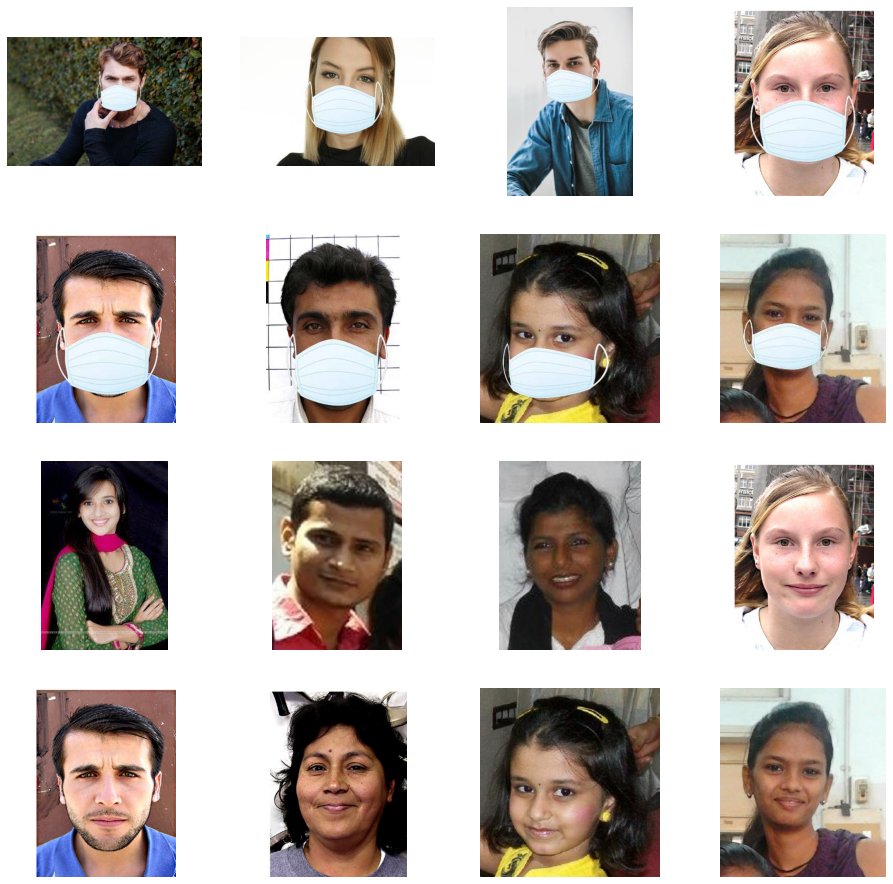

In [5]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

with_mask_pic = [os.path.join(with_mask_dir_path, imgname) 
                for imgname in with_mask_imgnames[ pic_index-8:pic_index] 
               ]

without_mask_pic = [os.path.join(without_mask_dir_path, imgname) 
                for imgname in without_mask_imgnames[ pic_index-8:pic_index]
               ]



for i, img_path in enumerate(with_mask_pic+without_mask_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

**Converting the Images into Grayscale**

In [5]:
img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            #Coverting the image into gray scale
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the gray scale into 50x50, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

**Scaling and Reshaping the Data**

In [6]:
import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

In [7]:
data.shape

(1376, 100, 100, 1)

**Saving the Data**

In [ ]:
np.save('smaller_set_data',data)
np.save('smaller_set_target',new_target)

**Loading the Data**

In [1]:
import numpy as np

small_data=np.load('smaller_set_data.npy')
small_target=np.load('smaller_set_target.npy')

#loading the save numpy arrays in the previous code

In [2]:
small_data.shape

(1376, 100, 100, 1)

**Splitting the Data**

In [9]:
from sklearn.model_selection import train_test_split

small_train_data,small_test_data,small_train_target,small_test_target=train_test_split(small_data,small_target,test_size=0.2,random_state=42)

In [10]:
small_train_data.shape

(1100, 100, 100, 1)

In [11]:
small_train_data

array([[[[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        ...,

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.75686275],
         [0.75686275],
         [0.75

In [12]:
small_data.shape[1:]

(100, 100, 1)

## Model Training

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D,MaxPooling2D
from keras import regularizers
from keras.layers import Flatten,BatchNormalization,Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
keras_callbacks   = [
      EarlyStopping(monitor='val_loss', patience=10, mode='min', min_delta=0.0001),
      ModelCheckpoint('./checkmodel.h5', monitor='val_loss', save_best_only=True, mode='min')
]


small_data_model = Sequential() # create Sequential model
small_data_model.add(Conv2D(9, (3,3), input_shape=small_data.shape[1:], padding='same', activation = 'relu')) 
small_data_model.add(BatchNormalization())
small_data_model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.2))

small_data_model.add(Conv2D(9, (3,3), padding='same',activation = 'relu')) 
small_data_model.add(BatchNormalization())
small_data_model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.2))

small_data_model.add(Conv2D(9, (3,3), padding='same',activation = 'relu')) 
small_data_model.add(BatchNormalization())
small_data_model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.2))

small_data_model.add(Flatten())
small_data_model.add(Dense(2, activation = 'softmax')) 
small_data_model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

small_data_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 100, 100, 9)       90        
_________________________________________________________________
batch_normalization_3 (Batch (None, 100, 100, 9)       36        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 50, 50, 9)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 50, 50, 9)         738       
_________________________________________________________________
batch_normalization_4 (Batch (None, 50, 50, 9)         36        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 25, 25, 9)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 25, 25, 9)        

In [14]:
small_data_train_history=small_data_model.fit(small_train_data,small_train_target,epochs=30,callbacks=keras_callbacks,validation_split=0.2)

Epoch 1/30
28/28 [==============================] - 6s 220ms/step - loss: 0.7295 - accuracy: 0.6977 - val_loss: 0.6545 - val_accuracy: 0.7545
Epoch 2/30
28/28 [==============================] - 6s 214ms/step - loss: 0.2849 - accuracy: 0.8818 - val_loss: 0.6342 - val_accuracy: 0.5909
Epoch 3/30
28/28 [==============================] - 6s 214ms/step - loss: 0.1891 - accuracy: 0.9375 - val_loss: 0.6140 - val_accuracy: 0.7182
Epoch 4/30
28/28 [==============================] - 6s 208ms/step - loss: 0.1385 - accuracy: 0.9534 - val_loss: 0.6376 - val_accuracy: 0.4864
Epoch 5/30
28/28 [==============================] - 6s 209ms/step - loss: 0.1043 - accuracy: 0.9648 - val_loss: 0.7744 - val_accuracy: 0.4773
Epoch 6/30
28/28 [==============================] - 6s 210ms/step - loss: 0.0807 - accuracy: 0.9773 - val_loss: 0.7684 - val_accuracy: 0.4773
Epoch 7/30
28/28 [==============================] - 6s 208ms/step - loss: 0.0660 - accuracy: 0.9864 - val_loss: 0.9329 - val_accuracy: 0.4773
Epoch 

## Model Performance Evaluation

In [15]:
print(small_data_model.evaluate(small_train_data,small_train_target))
print(small_data_model.evaluate(small_test_data,small_test_target))

35/35 [==============================] - 1s 23ms/step - loss: 0.0454 - accuracy: 0.9845
[0.045359496027231216, 0.9845454692840576]
9/9 [==============================] - 0s 23ms/step - loss: 0.1077 - accuracy: 0.9529
[0.10767054557800293, 0.9528985619544983]


**Plotting Training  and Validation Loss**

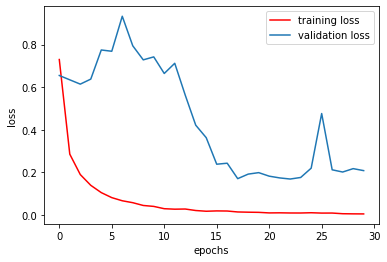

In [17]:
from matplotlib import pyplot as plt

plt.plot(small_data_train_history.history['loss'],'r',label='training loss')
plt.plot(small_data_train_history.history['val_loss'],label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

**Plotting Training and Validation Accuracy**

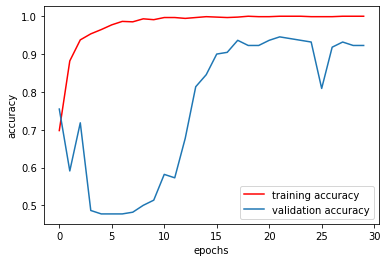

In [18]:
plt.plot(small_data_train_history.history['accuracy'],'r',label='training accuracy')
plt.plot(small_data_train_history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

**Performance Metrices**

In [30]:
import numpy as np
rounded_targets=np.argmax(small_test_target, axis=1)

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
small_data_model_classes = small_data_model.predict_classes(small_test_data)
small_data_model_acc = accuracy_score(rounded_targets,small_data_model_classes)
print("Classification Accuracy of the model: ",small_data_model_acc*100,'%')
small_data_model_prec = precision_score(rounded_targets,small_data_model_classes)
print("Precision Score of the model: ",small_data_model_prec*100,'%')
small_data_model_recall = recall_score(rounded_targets,small_data_model_classes)
print("Recall Score of the model: ",small_data_model_recall*100,'%')
small_data_model_f1 = f1_score(rounded_targets,small_data_model_classes)
print("F1 Score of the model: ",small_data_model_f1*100,'%')
small_data_model_roc = roc_auc_score(rounded_targets,small_data_model_classes)
print("AUC Score of the model: ",small_data_model_roc*100,'%')

Classification Accuracy of the model:  95.28985507246377 %
Precision Score of the model:  95.62043795620438 %
Recall Score of the model:  94.92753623188406 %
F1 Score of the model:  95.27272727272728 %
AUC Score of the model:  95.28985507246377 %


In [42]:
from sklearn.metrics import classification_report
small_data_model_classification_report = classification_report(rounded_targets,small_data_model_classes)
print("Classification Report: \n",small_data_model_classification_report)

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       138
           1       0.96      0.95      0.95       138

    accuracy                           0.95       276
   macro avg       0.95      0.95      0.95       276
weighted avg       0.95      0.95      0.95       276



In [43]:
from sklearn.metrics import confusion_matrix
small_data_model_confusion_matrix = confusion_matrix(rounded_targets,small_data_model_classes)
print("Confusion Matrix: \n",small_data_model_confusion_matrix)

Confusion Matrix: 
 [[132   6]
 [  7 131]]


**Saving the model**

In [11]:
small_data_model.save("smaller_dataset.model", save_format="h5",include_optimizer=False)

**Loading the model**

In [12]:
from keras.models import load_model
import cv2
import numpy as np
model = load_model('smaller_dataset.model',compile=False)

face_clsfr=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

source=cv2.VideoCapture(0)

labels_dict={0:'NO MASK',1:'MASK'}
color_dict={0:(0,0,255),1:(0,255,0)}

## Checking the model for Images

In [9]:
while(True):

    img=img=cv2.imread('D:\\Machine Learning Stuff\\Face Mask Recognizition\\Test Model\\Face Mask Detector Project by Tasnuva Tehrin\\example_3.jpg')
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_clsfr.detectMultiScale(gray,1.3,5)  

    for (x,y,w,h) in faces:
    
        face_img=gray[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(100,100))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,100,100,1))
        result=model.predict(reshaped)

        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
        
    cv2.imshow('LIVE',img)
    key=cv2.waitKey(1)
    
    if(key==27):
        break
        
cv2.destroyAllWindows()
source.release()

## Checking the model for Live Videos

In [13]:
while(True):

    ret,img=source.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_clsfr.detectMultiScale(gray,1.3,5)  

    for (x,y,w,h) in faces:
    
        face_img=gray[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(100,100))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,100,100,1))
        result=model.predict(reshaped)

        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
        
    cv2.imshow('LIVE',img)
    key=cv2.waitKey(1)
    
    if(key==27):
        break
        
cv2.destroyAllWindows()
source.release()